In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import sys
sns.set()

In [2]:
file_path='./model_outcomes'

In [32]:
baseline=pd.read_csv(file_path+'/baseline.csv',index_col=0)

In [33]:
baseline.shape

(4020, 93)

In [34]:
N=18700

In [35]:
baseline.R0=baseline.R0.apply(lambda x: round(complex(x).real,1))

In [36]:
baseline.columns

Index(['Susceptible: 0-9', 'Exposed: 0-9', 'Infected (symptomatic): 0-9',
       'Asymptomatically Infected: 0-9', 'Recovered: 0-9', 'Hospitalised: 0-9',
       'Critical: 0-9', 'Deaths: 0-9', 'Offsite: 0-9', 'Susceptible: Oct-19',
       'Exposed: Oct-19', 'Infected (symptomatic): Oct-19',
       'Asymptomatically Infected: Oct-19', 'Recovered: Oct-19',
       'Hospitalised: Oct-19', 'Critical: Oct-19', 'Deaths: Oct-19',
       'Offsite: Oct-19', 'Susceptible: 20-29', 'Exposed: 20-29',
       'Infected (symptomatic): 20-29', 'Asymptomatically Infected: 20-29',
       'Recovered: 20-29', 'Hospitalised: 20-29', 'Critical: 20-29',
       'Deaths: 20-29', 'Offsite: 20-29', 'Susceptible: 30-39',
       'Exposed: 30-39', 'Infected (symptomatic): 30-39',
       'Asymptomatically Infected: 30-39', 'Recovered: 30-39',
       'Hospitalised: 30-39', 'Critical: 30-39', 'Deaths: 30-39',
       'Offsite: 30-39', 'Susceptible: 40-49', 'Exposed: 40-49',
       'Infected (symptomatic): 40-49', 'Asympt

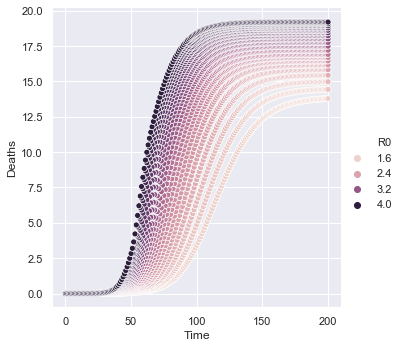

In [37]:
#Use this one
baseline.Deaths=baseline.Deaths*N
sns.relplot(x="Time", y="Deaths",
            hue="R0", data=baseline)

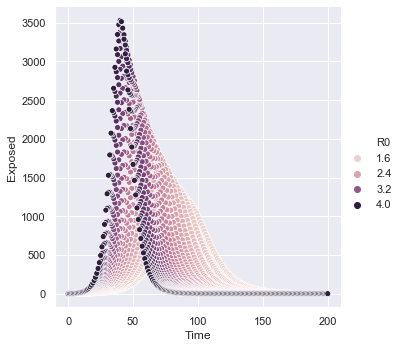

In [39]:
#Use this one
baseline.Exposed=baseline.Exposed*N
sns.relplot(x="Time", y="Exposed",
            hue="R0", data=baseline)

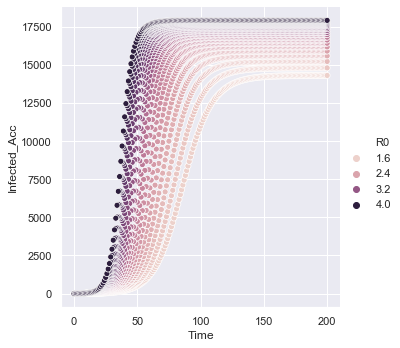

In [41]:
#Use this one
baseline['Infected_Acc']=(1-baseline.Susceptible)*N
sns.relplot(x="Time", y="Infected_Acc",
            hue="R0", data=baseline)

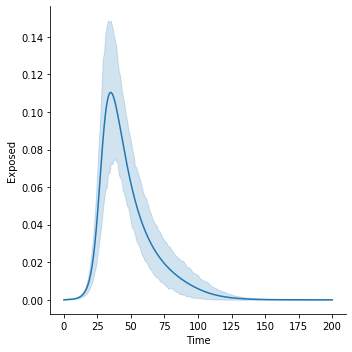

In [15]:
#Do not use this one

sns.relplot(x="Time", y="Exposed", kind="line", data=baseline)

/Users/billyzhaoyh/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/billyzhaoyh/.local/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/Users/billyzhaoyh/.local/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


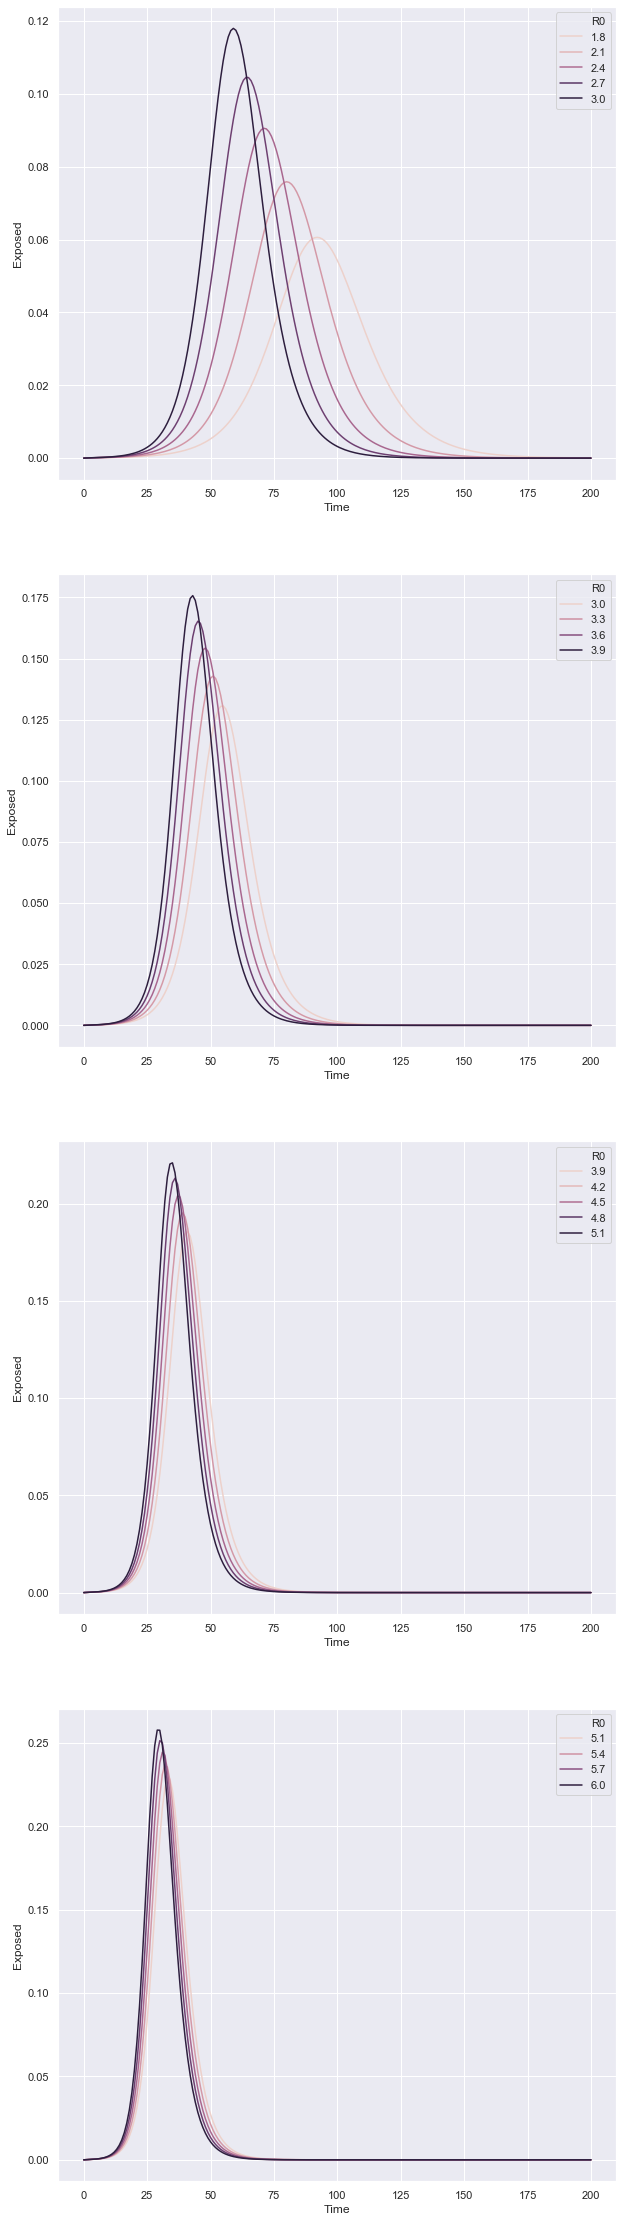

In [59]:
fig, ax =plt.subplots(4,1,figsize=(10,40))

sns.lineplot(x="Time", y="Exposed",
            hue="R0", data=baseline[baseline.R0 < 3],ax=ax[0])

sns.lineplot(x="Time", y="Exposed",
            hue="R0", data=baseline[baseline.R0 >= 3][baseline.R0 < 4],ax=ax[1])

sns.lineplot(x="Time", y="Exposed",
            hue="R0", data=baseline[baseline.R0 >= 4][baseline.R0 < 5],ax=ax[2]);

sns.lineplot(x="Time", y="Exposed",
            hue="R0", data=baseline[baseline.R0 >= 5],ax=ax[3]);

# legend = ax.legend()
# legend.texts[0].set_text("Basic reproduction number")
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles=handles[1:], labels=labels[1:])

fig.show()

In [57]:
ax[0].legend()

/Users/billyzhaoyh/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/billyzhaoyh/.local/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/Users/billyzhaoyh/.local/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


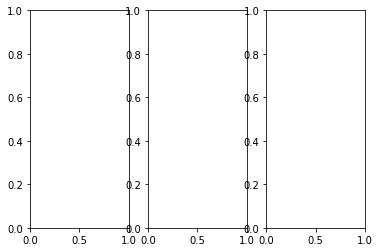

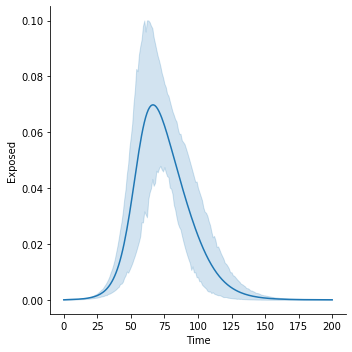

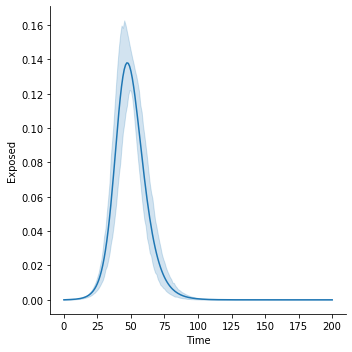

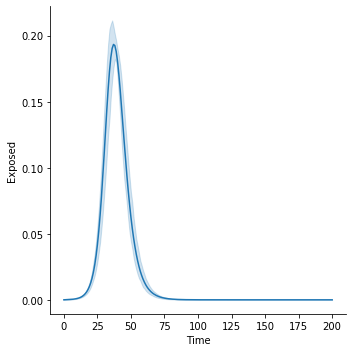

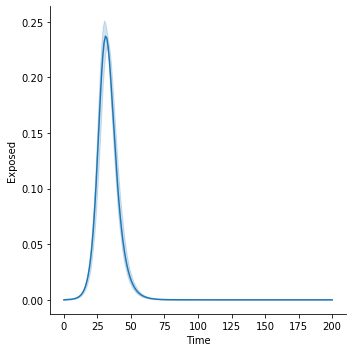

In [24]:
fig, ax =plt.subplots(1,3)

sns.relplot(x="Time", y="Exposed",
             kind="line", data=baseline[baseline.R0 < 3])

sns.relplot(x="Time", y="Exposed",
             kind="line", data=baseline[baseline.R0 >= 3][baseline.R0 < 4])

sns.relplot(x="Time", y="Exposed",
             kind="line", data=baseline[baseline.R0 >= 4][baseline.R0 < 5]);

sns.relplot(x="Time", y="Exposed",
             kind="line", data=baseline[baseline.R0 >= 5]);

fig.show()

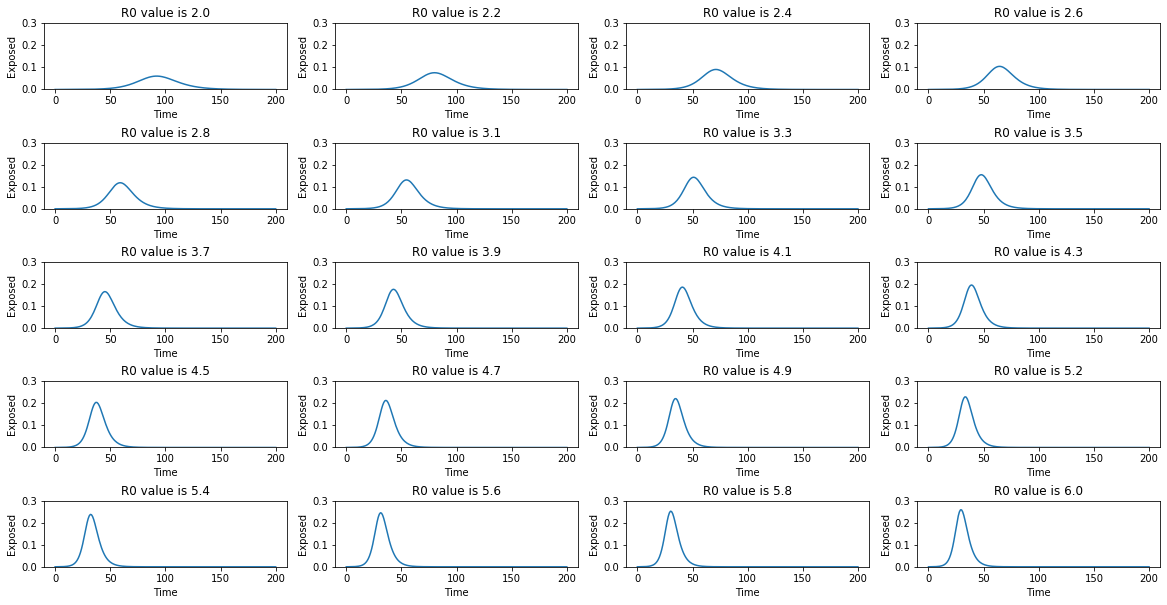

In [39]:
fig, ax =plt.subplots(5,4, figsize = (20,10))
fig.subplots_adjust(hspace=.8)
r0_vals = list(set(baseline.R0))
ylim=[0,0.3]
for r0_val, axis in zip(sorted(r0_vals), ax.flatten()):
    sns.lineplot(x="Time", y="Exposed",
            data=baseline[baseline.R0 == r0_val], ax = axis)
    axis.set_ylim(ylim)
    axis.title.set_text(f'R0 value is {round(r0_val,1)}')